In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/content/sales_data_sample.csv"
df = pd.read_csv(file_path, encoding="latin1")

In [3]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

In [4]:
df = df.dropna(subset=['ORDERDATE'])

In [5]:
df['YEAR_MONTH'] = df['ORDERDATE'].dt.to_period('M')

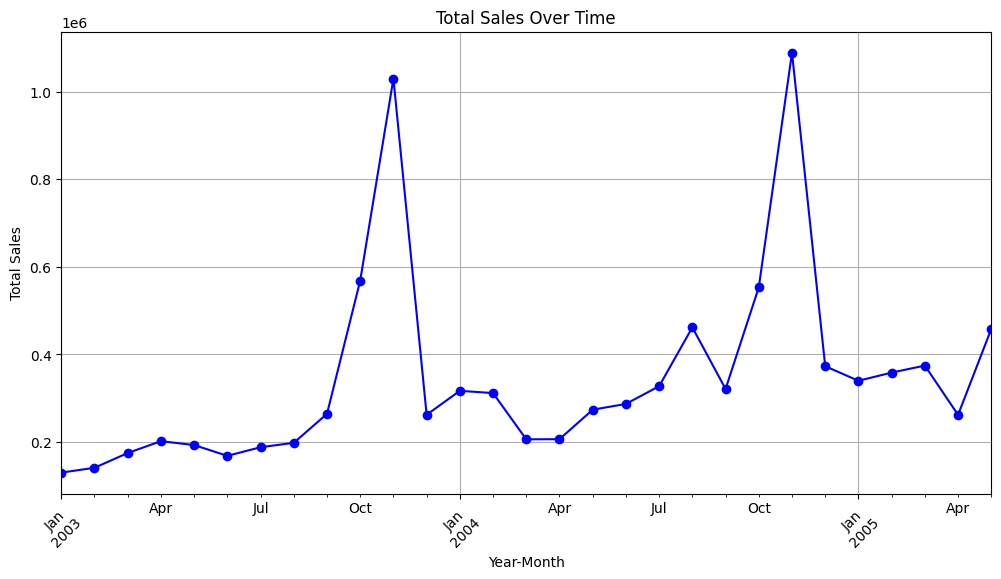

In [6]:
plt.figure(figsize=(12, 6))
df.groupby('YEAR_MONTH')['SALES'].sum().plot(marker='o', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()


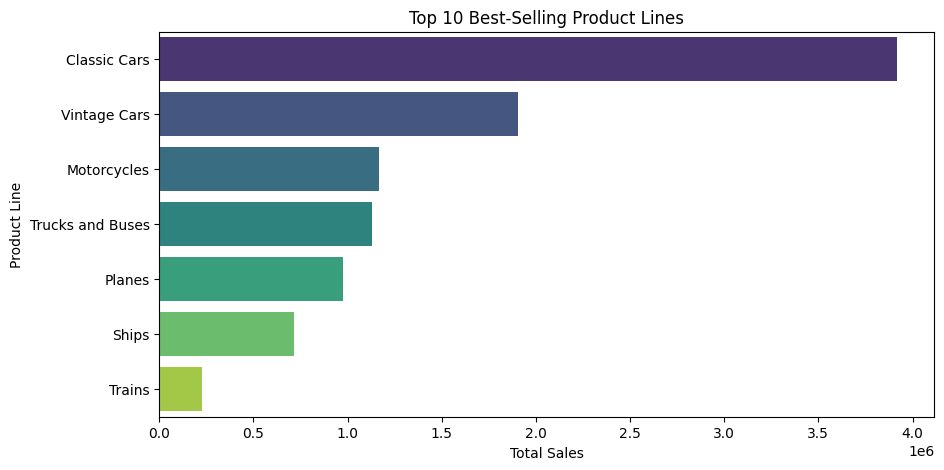

In [9]:
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='viridis', legend=False)
plt.title('Top 10 Best-Selling Product Lines')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

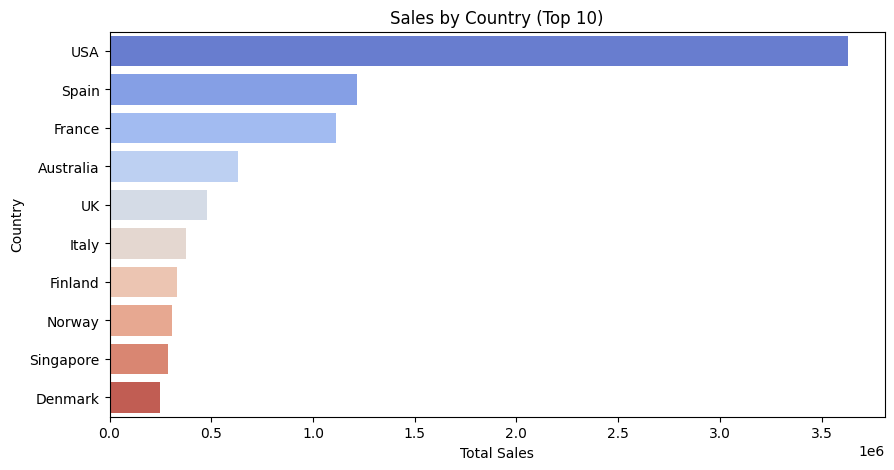

In [11]:
df_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=df_country.values, y=df_country.index, hue=df_country.index, palette='coolwarm', legend=False)
plt.title('Sales by Country (Top 10)')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

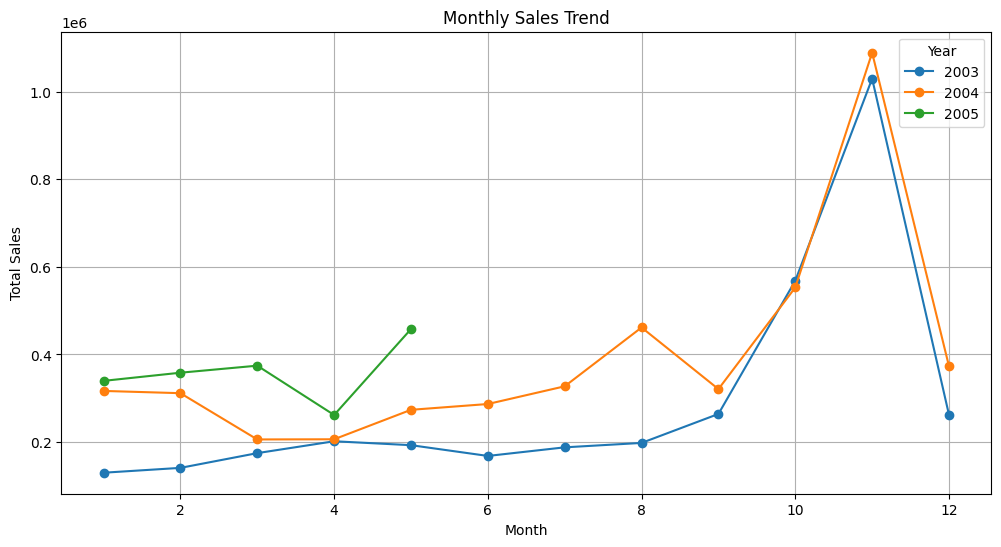

In [12]:
monthly_sales = df.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().unstack()
monthly_sales.T.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid()
plt.show()

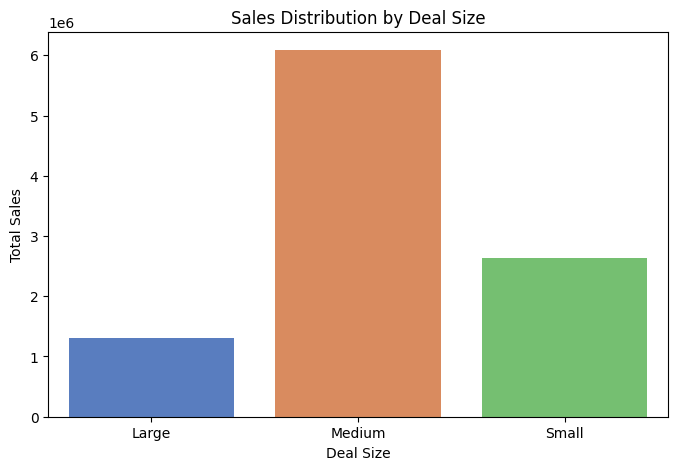

In [14]:
deals = df.groupby('DEALSIZE')['SALES'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=deals.index, y=deals.values, hue=deals.index, palette='muted', legend=False)
plt.title('Sales Distribution by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.show()

In [15]:
print("Analysis Completed Successfully!")

Analysis Completed Successfully!
